# Import Libraries and Setup

In [79]:
"""
EduPsyCare Project Notebook
Objective: Load the Student Depression Dataset, perform exploratory data analysis (EDA),
           preprocess the data, and visualize the results both before and after cleaning.
Author: Dang Nguyen Giap
Date: 16-03-2025
"""

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# Setup display options for matplotlib and seaborn
%matplotlib inline
sns.set(style="whitegrid")

print("Libraries imported successfully.")


Libraries imported successfully.


#  Preliminary EDA

> Data Ingestion

In [80]:
# Define the data file path
DATA_PATH = r"G:\FPT University\2025\SPR_25\DAP391m\EduPsyCare\data\Student_Depression_Dataset.csv"

# Load the dataset into a pandas DataFrame
try:
    df = pd.read_csv(DATA_PATH)
    print("Data loaded successfully from:", DATA_PATH)
except FileNotFoundError:
    print(f"Error: The file at {DATA_PATH} was not found.")
    raise

# Display the first 5 rows and the dataset information
print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset Information:")
df.info()

Data loaded successfully from: G:\FPT University\2025\SPR_25\DAP391m\EduPsyCare\data\Student_Depression_Dataset.csv
First 5 rows of the dataset:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non

> Preliminary Exploratory Data Analysis

In [81]:
# Descriptive statistics for numerical columns
print("Descriptive statistics:")
display(df.describe())

# Check for missing values in each column
print("\nMissing values per column:")
missing_values = df.isnull().sum()
print(missing_values)

Descriptive statistics:


,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000



Missing values per column:
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


# Initial Visualizations (Before Preprocessing)

> Histograms for Continuous Variables

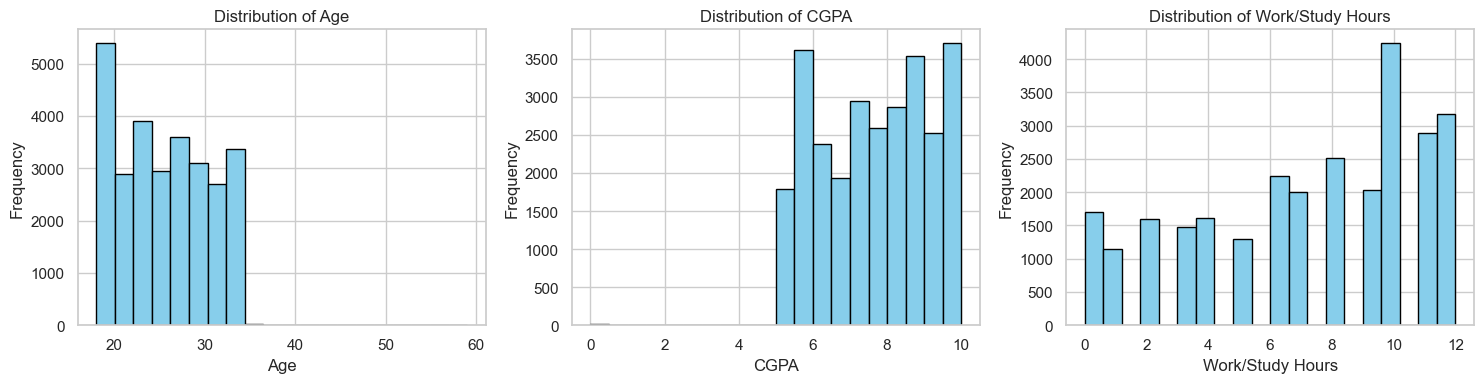

In [82]:
# List of continuous columns to visualize (customize as needed)
continuous_vars = ['Age', 'CGPA', 'Work/Study Hours']

plt.figure(figsize=(15, 4))
for idx, var in enumerate(continuous_vars, start=1):
    plt.subplot(1, len(continuous_vars), idx)
    plt.hist(df[var].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

> Pie Chart for the Target Variable

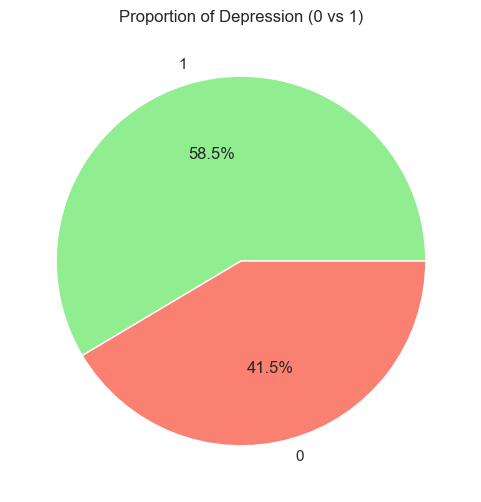

In [83]:
# Pie chart for the target variable "Depression"
depression_counts = df['Depression'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(depression_counts, labels=depression_counts.index, autopct='%1.1f%%',
        colors=['lightgreen', 'salmon'])
plt.title("Proportion of Depression (0 vs 1)")
plt.show()

 > Count Plots for Categorical Variables

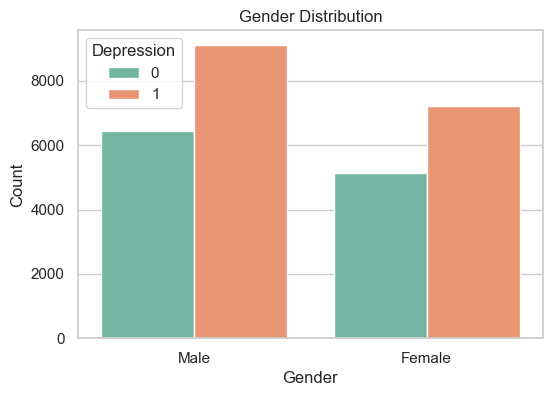

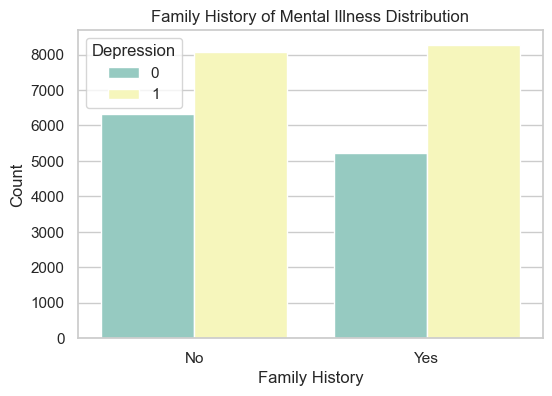

In [84]:
# Count plot for 'Gender'
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, hue='Depression', palette='Set2')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Count plot for 'Family History of Mental Illness'
plt.figure(figsize=(6, 4))
sns.countplot(x='Family History of Mental Illness', data=df, hue='Depression', palette='Set3')
plt.title("Family History of Mental Illness Distribution")
plt.xlabel("Family History")
plt.ylabel("Count")
plt.show()

# Data Preprocessing

> Handling Missing Values

In [85]:
# Handle missing values for the 'Financial Stress' column by filling with the column mean
missing_financial = df["Financial Stress"].isnull().sum()
print(f"Missing values in 'Financial Stress': {missing_financial}")

if missing_financial > 0:
    df = df.copy()  # make an explicit copy to avoid warnings
    df["Financial Stress"] = df["Financial Stress"].fillna(df["Financial Stress"].mean())
    print("Filled missing 'Financial Stress' values with column mean.")
else:
    print("No missing values in 'Financial Stress'.")

Missing values in 'Financial Stress': 3
Filled missing 'Financial Stress' values with column mean.


> Converting 'Sleep Duration' to Numeric Values

In [86]:
def convert_sleep_duration(duration: str) -> float:
    """
    Convert sleep duration from string format (e.g., '5-6 hours' or 'Less than 5 hours')
    to a numeric value representing the average sleep time.

    Parameters:
        duration (str): Sleep duration description.

    Returns:
        float: Estimated average sleep duration.
    """
    if pd.isna(duration):
        return np.nan
    if "Less than" in duration:
        return 4.5  # estimated value for "Less than 5 hours"
    if "-" in duration:
        try:
            lower, upper = duration.split()[0].split("-")
            return (float(lower) + float(upper)) / 2
        except Exception:
            return np.nan
    try:
        return float(duration.split()[0])
    except Exception:
        return np.nan

# Apply the conversion function to create a new numeric column
df["Sleep Duration Numeric"] = df["Sleep Duration"].apply(convert_sleep_duration)
print("Sample conversion for 'Sleep Duration':")
display(df[["Sleep Duration", "Sleep Duration Numeric"]].head())

Sample conversion for 'Sleep Duration':


,Sleep Duration,Sleep Duration Numeric
0,5-6 hours,5.5
1,5-6 hours,5.5
2,Less than 5 hours,4.5
3,7-8 hours,7.5
4,5-6 hours,5.5


> Encoding Categorical Variables

In [87]:
from sklearn.preprocessing import LabelEncoder

# Initialize and apply label encoding for 'Gender'
gender_encoder = LabelEncoder()
df["Gender_encoded"] = gender_encoder.fit_transform(df["Gender"])

# Initialize and apply label encoding for 'Family History of Mental Illness'
family_encoder = LabelEncoder()
df["FamilyHistory_encoded"] = family_encoder.fit_transform(df["Family History of Mental Illness"])

print("Sample of encoded categorical variables:")
display(df[['Gender', 'Gender_encoded', 'Family History of Mental Illness', 'FamilyHistory_encoded']].head())

Sample of encoded categorical variables:


,Gender,Gender_encoded,Family History of Mental Illness,FamilyHistory_encoded
0,Male,1,No,0
1,Female,0,Yes,1
2,Male,1,Yes,1
3,Female,0,Yes,1
4,Female,0,No,0


> Feature Engineering: Creating a 'pressure_index'

In [88]:
# Create a new feature: pressure_index = Academic Pressure + Financial Stress + Work Pressure
df["pressure_index"] = df["Academic Pressure"] + df["Financial Stress"] + df["Work Pressure"]

print("Sample of the new feature 'pressure_index':")
display(df[["Academic Pressure", "Financial Stress", "Work Pressure", "pressure_index"]].head())

Sample of the new feature 'pressure_index':


,Academic Pressure,Financial Stress,Work Pressure,pressure_index
0,5.0,1.0,0.0,6.0
1,2.0,2.0,0.0,4.0
2,3.0,1.0,0.0,4.0
3,3.0,5.0,0.0,8.0
4,4.0,1.0,0.0,5.0


# Post-Processing Visualizations

> Reviewing DataFrame Information After Preprocessing

In [89]:
# Display the DataFrame information after preprocessing
print("DataFrame information after preprocessing:")
df.info()

DataFrame information after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration             

> Histograms for Processed Variables

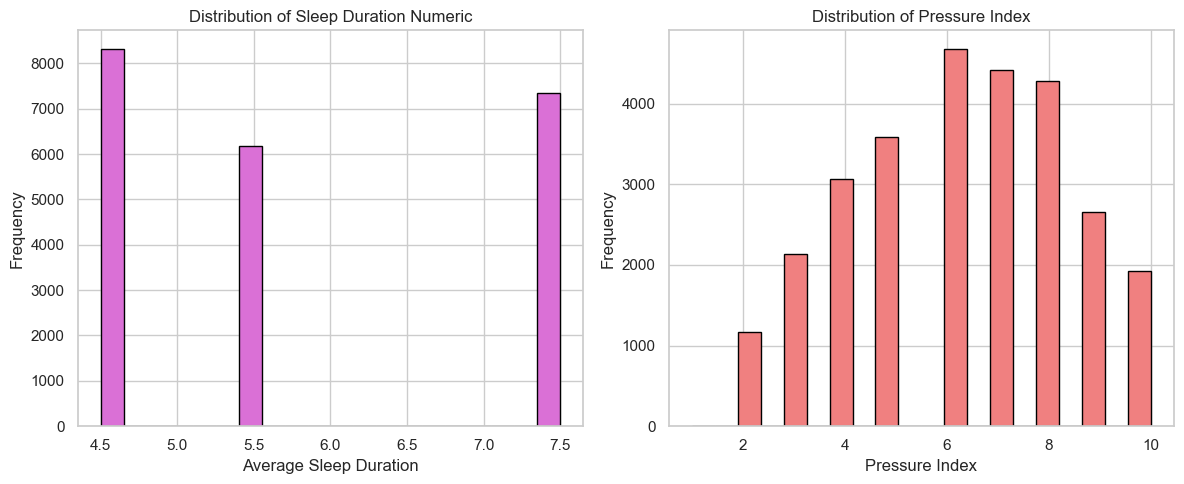

In [90]:
plt.figure(figsize=(12, 5))

# Histogram for Sleep Duration Numeric
plt.subplot(1, 2, 1)
plt.hist(df["Sleep Duration Numeric"].dropna(), bins=20, color='orchid', edgecolor='black')
plt.title("Distribution of Sleep Duration Numeric")
plt.xlabel("Average Sleep Duration")
plt.ylabel("Frequency")

# Histogram for pressure_index
plt.subplot(1, 2, 2)
plt.hist(df["pressure_index"], bins=20, color='lightcoral', edgecolor='black')
plt.title("Distribution of Pressure Index")
plt.xlabel("Pressure Index")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

> Boxplots for Outlier Detection

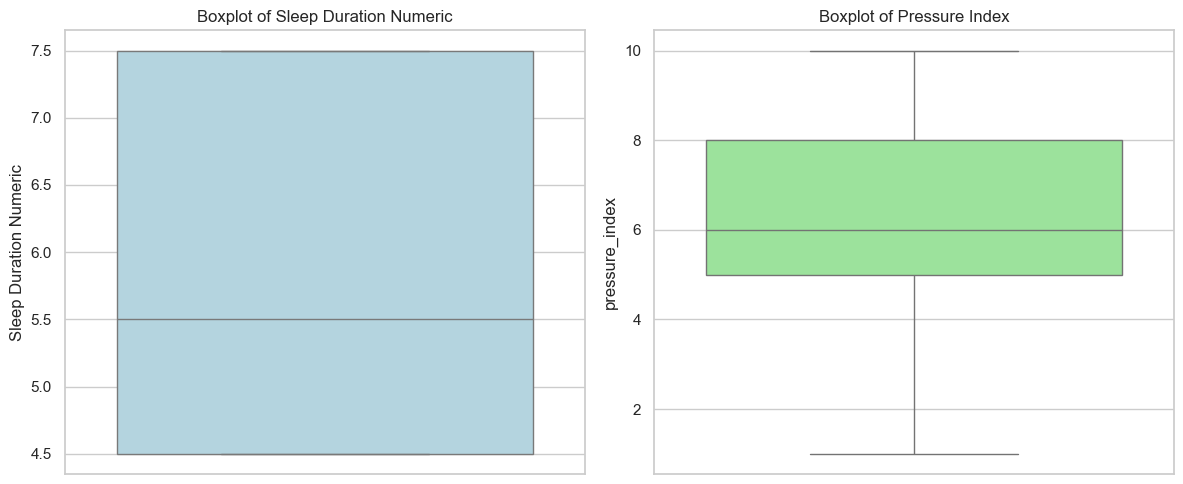

In [91]:
plt.figure(figsize=(12, 5))

# Boxplot for Sleep Duration Numeric
plt.subplot(1, 2, 1)
sns.boxplot(y=df["Sleep Duration Numeric"], color='lightblue')
plt.title("Boxplot of Sleep Duration Numeric")

# Boxplot for pressure_index
plt.subplot(1, 2, 2)
sns.boxplot(y=df["pressure_index"], color='lightgreen')
plt.title("Boxplot of Pressure Index")

plt.tight_layout()
plt.show()

> Correlation Heatmap

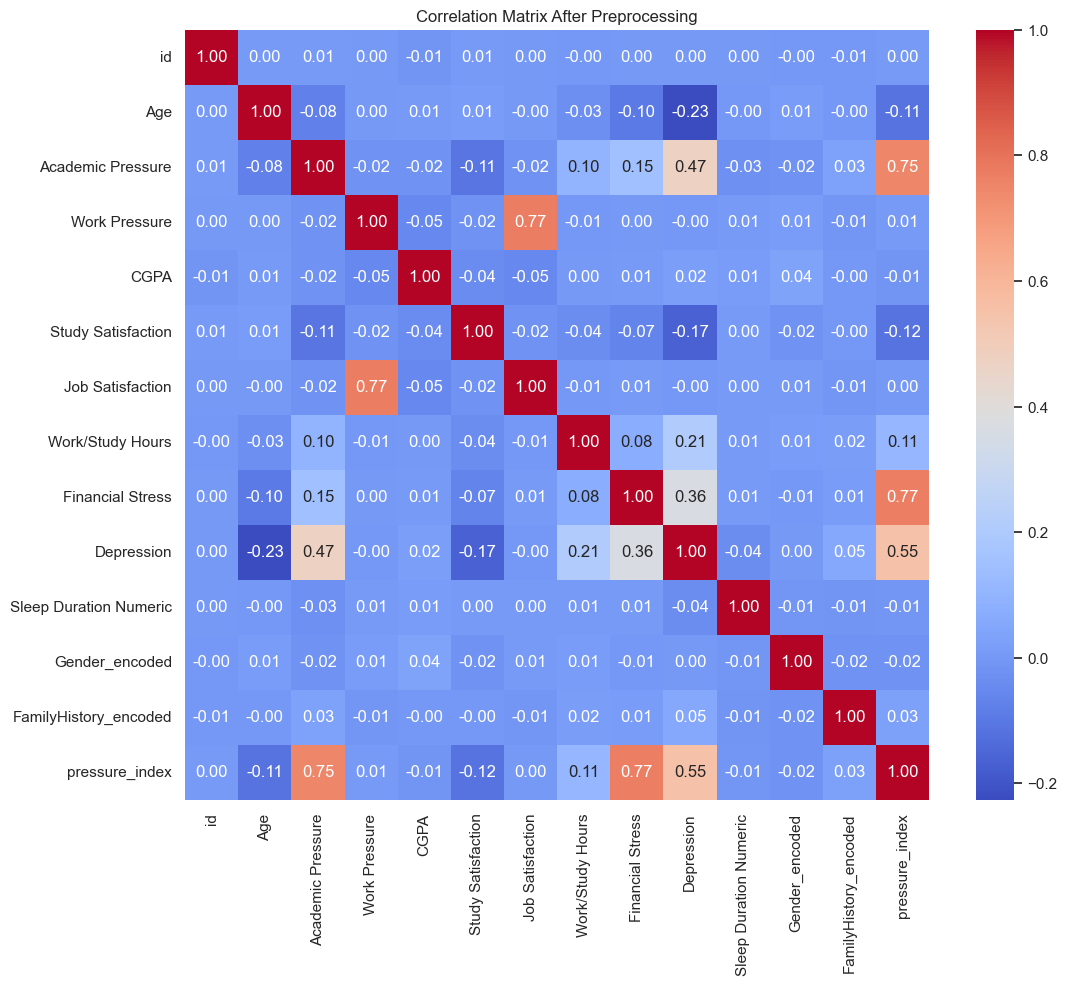

In [92]:
df_numeric = df.select_dtypes(include=[np.number])
corr_matrix = df_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix After Preprocessing")
plt.show()

> Scatter Plot and Pairplot for Relationships

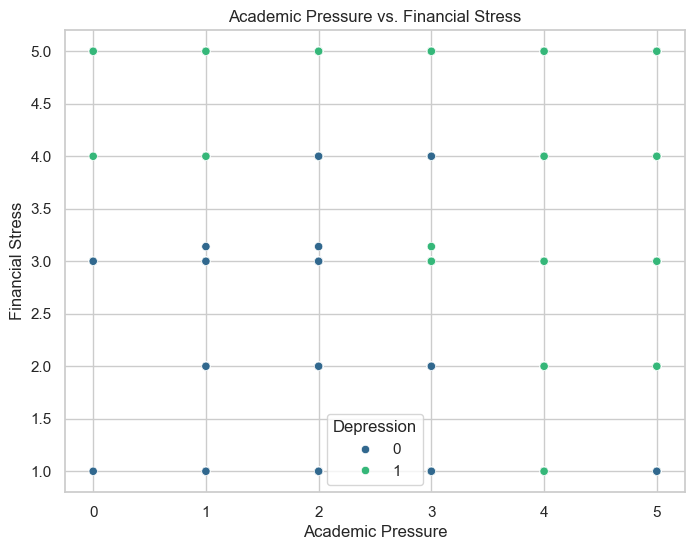

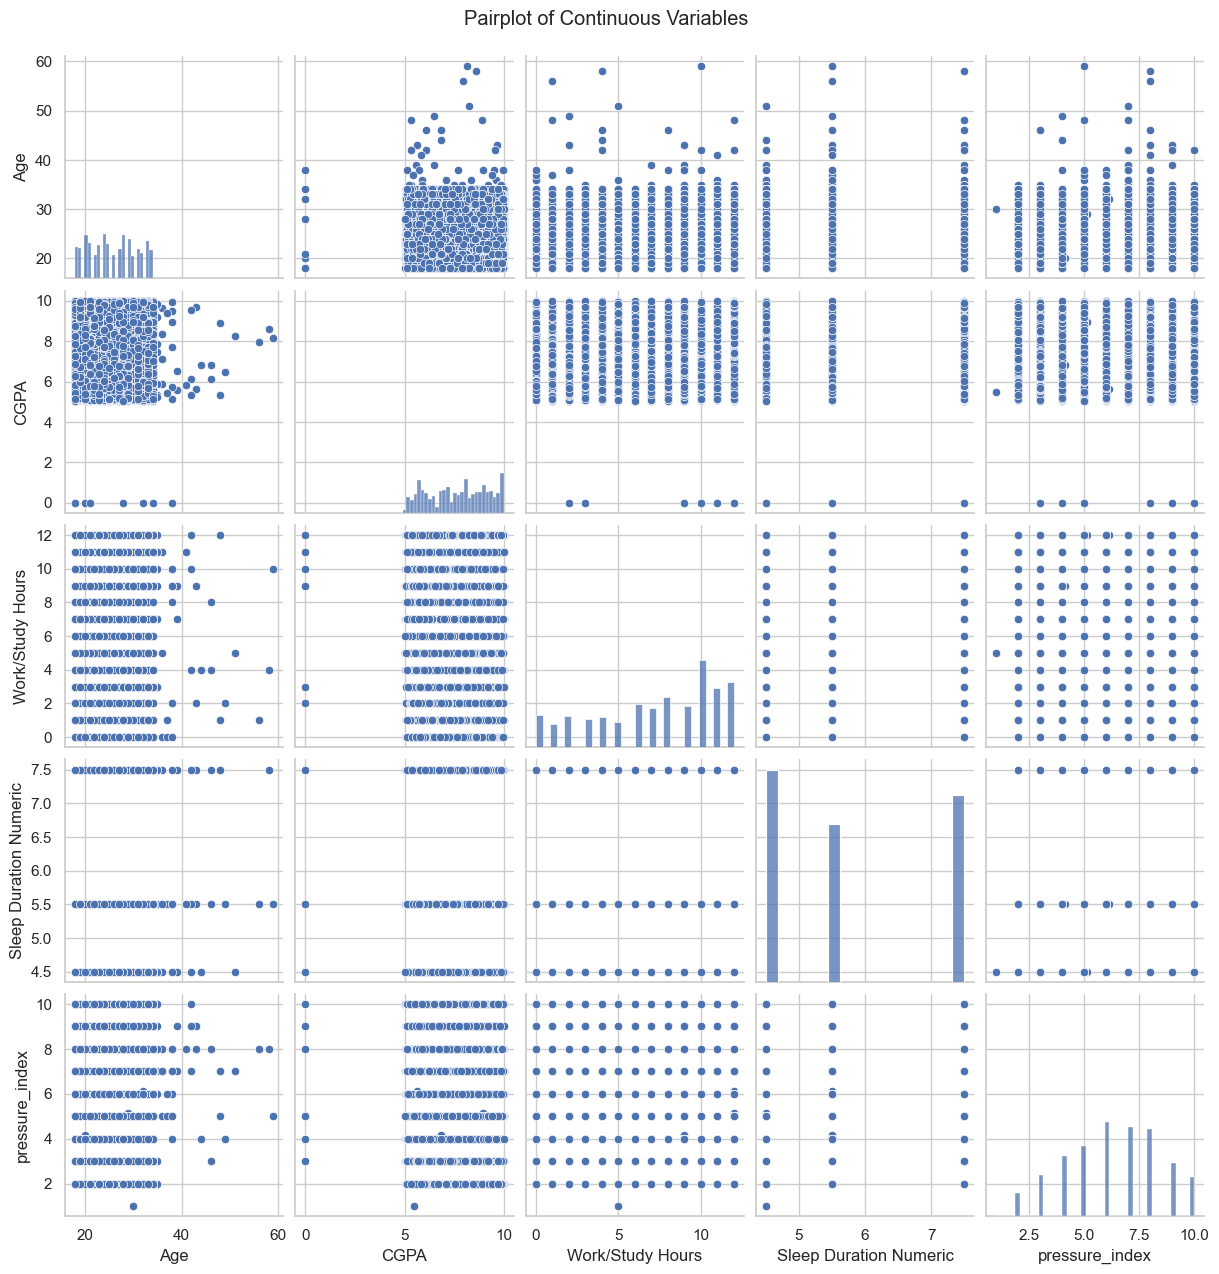

In [93]:
# Scatter plot: Academic Pressure vs. Financial Stress colored by Depression
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Academic Pressure', y='Financial Stress', hue='Depression', palette='viridis')
plt.title("Academic Pressure vs. Financial Stress")
plt.xlabel("Academic Pressure")
plt.ylabel("Financial Stress")
plt.show()

# Pairplot for continuous variables after preprocessing
continuous_vars_after = ['Age', 'CGPA', 'Work/Study Hours', 'Sleep Duration Numeric', 'pressure_index']
sns.pairplot(df[continuous_vars_after].dropna())
plt.suptitle("Pairplot of Continuous Variables", y=1.02)
plt.show()

# Saving the Preprocessed Data

In [94]:
# Save the cleaned and preprocessed data for future use (e.g., model training)
CLEAN_DATA_PATH = r"G:\FPT University\2025\SPR_25\DAP391m\EduPsyCare\data\Student_Depression_Dataset_clean.csv"
df.to_csv(CLEAN_DATA_PATH, index=False)
print("Cleaned data saved to:", CLEAN_DATA_PATH)

Cleaned data saved to: G:\FPT University\2025\SPR_25\DAP391m\EduPsyCare\data\Student_Depression_Dataset_clean.csv
